The Notebook is structured as follows:

| No | Topic |
| :-: | :-: |
| 1 | Getting the dataSet |
| 2 | Applying the tSNE |
| 3 | Plotting and visualizing |
| 4 | Applying the MDS |
| 5 | Plotting and visualizing |
| 6 | Adding noise to the labels |
| 7 | And Visualizing the changes |
| 8 | Finding the entropy |
| 9 | Building the plot of noise vs entropy |


In [2]:
# Step 1. Getting the dataset.
# For this we will be working on the iris datsset
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from sklearn.manifold import TSNE

In [4]:
# Loading the iris datset
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
type(iris)

sklearn.utils.Bunch

In [6]:
X_tsne = TSNE(learning_rate = 100).fit_transform(iris.data)

In [8]:
type(iris.data)

numpy.ndarray

In [9]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [57]:
iris.target

array([1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [11]:
# So it shows that:
# 0 - 50    - class 0
# 50 - 100  - class 1
# 100 - 150 - class 2

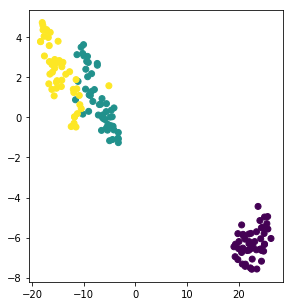

In [12]:
figure(figsize = (10,5) )
subplot(121)
scatter(X_tsne[:,0], X_tsne[:,1], c = iris.target)

In [61]:
# As you can See this are the scatter plot
# Of the above data.
# Now let us add noise to the above data
def add_noise(percentage):
    'Adds the given percentage of noise to the iris data and returns the new data'
    # Original 
    target = [0 for i in range(50)] + [ 1 for i in range(50)] + [ 2 for i in range(50)]  
    # 0   - 50   : class 0 
    # 50 - 100   : class 1
    # 100 - 150  : class 2
    # We will change the labels in a class label randomly
    import random
    # Offset for percentage => (window size)* precentage
    offset = 50 * percentage // 100
    for i in range(0, 0 + offset ):
        target[i] = random.choice([1,2])
    for i in range(50, 50 + offset):
        target[i] = random.choice([0,2])
    for i in range(100,100 + offset):
        target[i] = random.choice([0,1])
    
    # Got the new labeled data
    # Now we can plot the tsne with this.
    print("Plotting the data with Noise => ", percentage , " %")
    figure( figsize = (20,10))
    subplot(242)
    scatter(X_tsne[:,0], X_tsne[:,1], c = target)
    print("Done!")
    return target

Plotting the data with Noise =>  10  %
Done!


[1,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

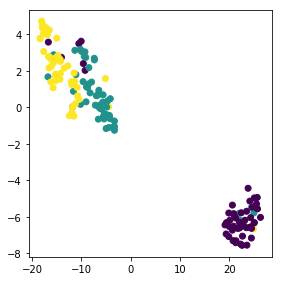

In [62]:
add_noise(10)

Plotting the data with Noise =>  10  %
Done!


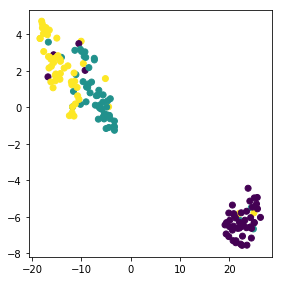

In [15]:
add_noise(10)

Plotting the data with Noise =>  20  %
Done!


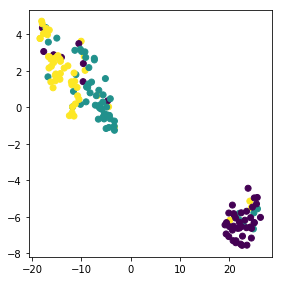

In [16]:
add_noise(20)

Plotting the data with Noise =>  30  %
Done!


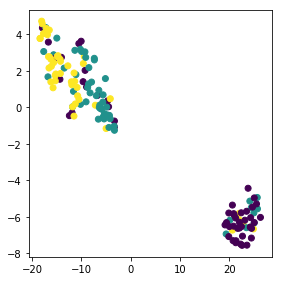

In [17]:
add_noise(30)

Plotting the data with Noise =>  40  %
Done!


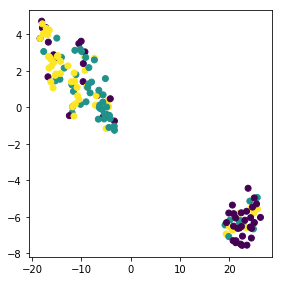

In [18]:
add_noise(40)

Plotting the data with Noise =>  50  %
Done!


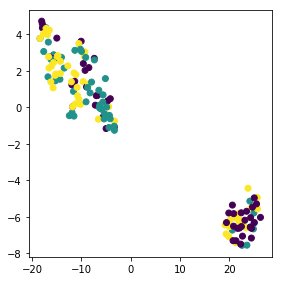

In [19]:
add_noise(50)

Plotting the data with Noise =>  60  %
Done!


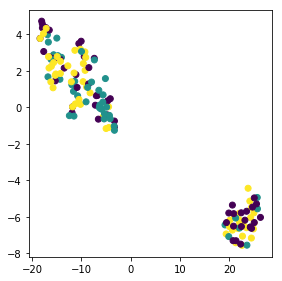

In [20]:
add_noise(60)

Plotting the data with Noise =>  70  %
Done!


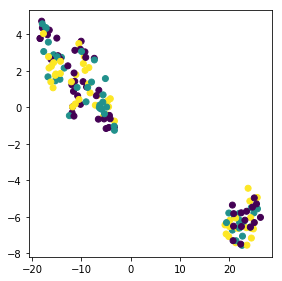

In [21]:
add_noise(70)

Plotting the data with Noise =>  80  %
Done!


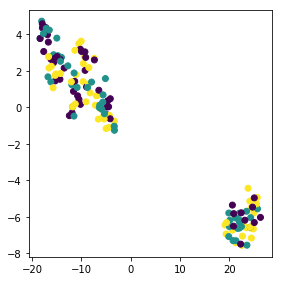

In [22]:
add_noise(80)

Plotting the data with Noise =>  90  %
Done!


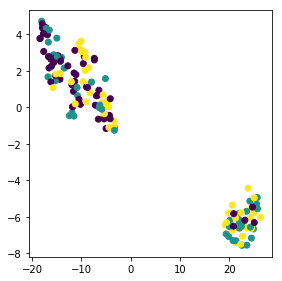

In [23]:
add_noise(90)

Plotting the data with Noise =>  100  %
Done!


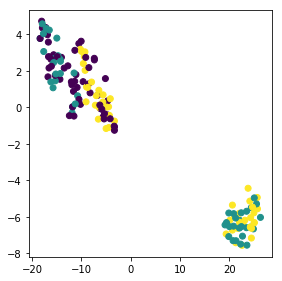

In [24]:
add_noise(100)

In [41]:
# Finding the entropy in a cluster.
# p(class sample) log p(class Sample)
# The add_noise  function will return the new labels.
# So using that we can calculate the probability in a cluster.
# for each label we can calculate the 
from math import log
en = lambda x : sum( [-( i/50 * log(i/50) ) for i in x if i!= 0])

def entropy(data,noise):
    # Specific implementation for the iris dataset.
    # 0 - 50 samples    : Cluster 1
    # 50 - 100 samples  : Cluster 2
    # 50 - 150 samples  : Cluster 3
    clusters = [ [0,0,0] , [0,0,0] , [0,0,0]]
    for i in range(0,150):
        if i<50:
            clusters[0][data[i]] += 1
        elif 50<= i < 100:
            clusters[1][data[i]] += 1
        elif 100<= i < 150:
            clusters[2][data[i]] += 1
    # Print the clusters
    print("Here are the clusters")
    print(clusters)
    # Get the entropy
    en1 = sum(list(map(en,[clusters[0],clusters[1],clusters[2]])))
#     en2 = sum(list(map(en,clusters[1])))
#     en3 = sum(list(map(en,clusters[2])))
    print("Entropy for Cluster 1:",en1)
#     print("Entropy for Cluster 2:",en2)
#     print("Entropy for Cluster 3:",en3)
    print("Total Entropy : ", en1 )
    print("So with noise = ", noise, " % Entropy = ", en1)
    return [noise,en1]
        


Plotting the data with Noise =>  20  %
Done!


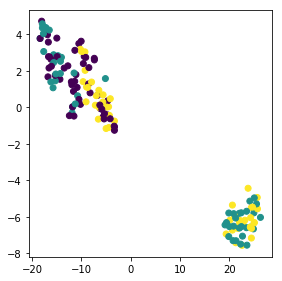

In [39]:
target = add_noise(20)

In [35]:
target

array([1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 2, 1, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0,
       0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1])

In [36]:
len(target)

150

In [42]:
entropy(target,20)

Here are the clusters
[[0, 26, 24], [27, 0, 23], [24, 26, 0]]
Entropy for Cluster 1: 2.0746376926383223
Total Entropy :  2.0746376926383223
So with noise =  20  % Entropy =  2.0746376926383223


[20, 2.0746376926383223]

Plotting the data with Noise =>  0  %
Done!
Here are the clusters
[[50, 0, 0], [0, 50, 0], [0, 0, 50]]
Entropy for Cluster 1: 0.0
Total Entropy :  0.0
So with noise =  0  % Entropy =  0.0
Plotting the data with Noise =>  10  %
Done!
Here are the clusters
[[45, 3, 2], [3, 45, 2], [2, 3, 45]]
Entropy for Cluster 1: 1.1771524202771215
Total Entropy :  1.1771524202771215
So with noise =  10  % Entropy =  1.1771524202771215
Plotting the data with Noise =>  20  %
Done!
Here are the clusters
[[40, 5, 5], [6, 40, 4], [6, 4, 40]]
Entropy for Cluster 1: 1.9090413735302552
Total Entropy :  1.9090413735302552
So with noise =  20  % Entropy =  1.9090413735302552
Plotting the data with Noise =>  30  %
Done!
Here are the clusters
[[35, 6, 9], [9, 35, 6], [8, 7, 35]]
Entropy for Cluster 1: 2.4436768991643794
Total Entropy :  2.4436768991643794
So with noise =  30  % Entropy =  2.4436768991643794
Plotting the data with Noise =>  40  %
Done!
Here are the clusters
[[30, 11, 9], [8, 30, 12], [10, 10, 30]]

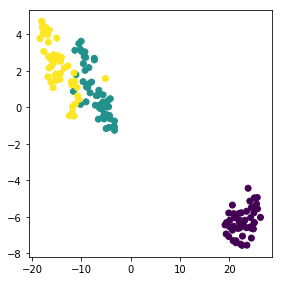

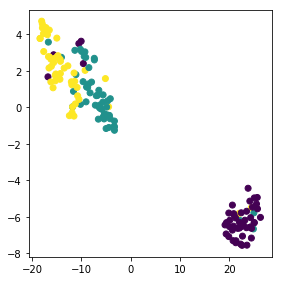

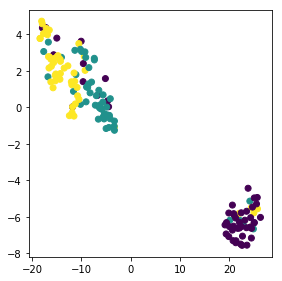

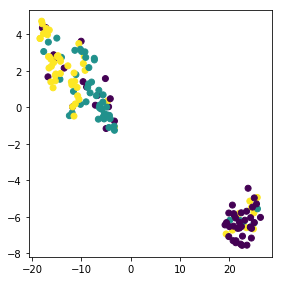

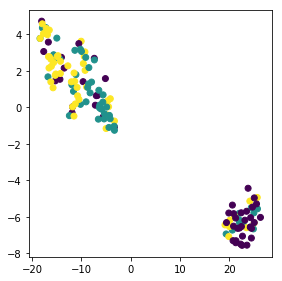

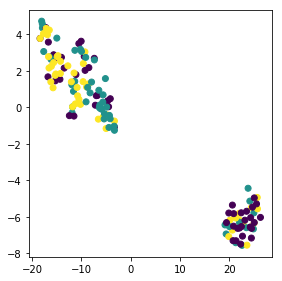

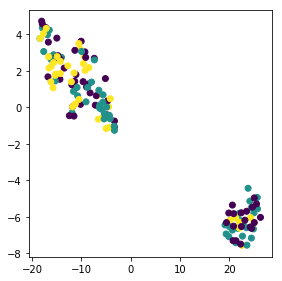

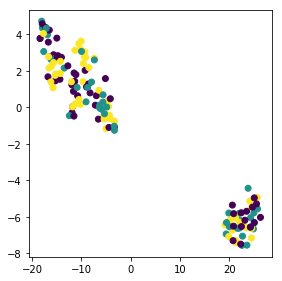

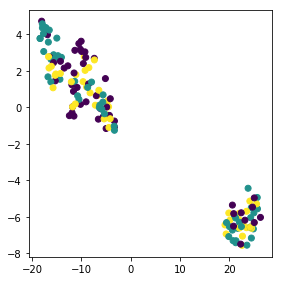

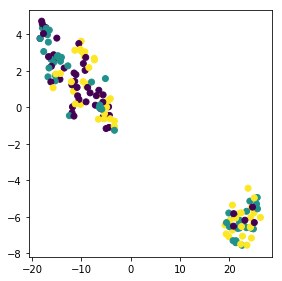

In [63]:
x = []
y = []

for i in range(0,100,10):
    d = add_noise(i)
    xx, yy = entropy(d,i)
    x.append(xx)
    y.append(yy)

In [64]:
x

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [65]:
y

[0.0,
 1.1771524202771215,
 1.9090413735302552,
 2.4436768991643794,
 2.840754065540885,
 3.1115448254771896,
 3.206631700417066,
 3.2010008982332874,
 3.130583978191222,
 2.833589349483871]

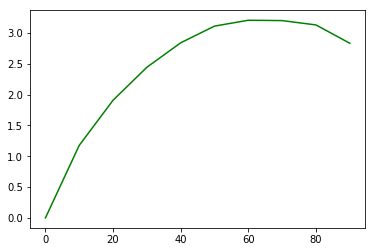

In [66]:
# Plotting the results
plt.plot(x,y,'g')
plt.show()

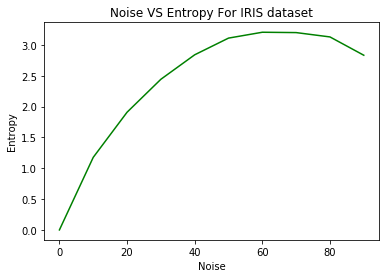

In [67]:
plt.xlabel('Noise')
plt.ylabel('Entropy')
plt.title('Noise VS Entropy For IRIS dataset')
plt.plot(x,y,'g')
plt.show()

In [ ]:
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding(X_mds,
               "MDS embedding of the digits (time %.2fs)" %
               (time() - t0))